<a href="https://colab.research.google.com/github/sophicist/StudentsWork-Lessons-/blob/akeem/HousePredML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [11]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
df = pd.read_csv('/content/drive/MyDrive/personal projects/AmesHousing.csv')

In [13]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

EXPLORATORY DATA ANALYSIS

In [19]:
#SELECT RELEVANT COLUMNS
data = df[[
    "Lot Area","Street","House Style","Bldg Type","Overall Cond","Year Remod/Add",
    "Roof Style", "Foundation","Heating","Central Air","1st Flr SF","2nd Flr SF",
    "Garage Type","Garage Area","Paved Drive","Pool Area","SalePrice","Misc Val","Mo Sold","Yr Sold","Sale Type"
]]
data.shape

(2930, 21)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2930 non-null   int64  
 1   Street          2930 non-null   object 
 2   House Style     2930 non-null   object 
 3   Bldg Type       2930 non-null   object 
 4   Overall Cond    2930 non-null   int64  
 5   Year Remod/Add  2930 non-null   int64  
 6   Roof Style      2930 non-null   object 
 7   Foundation      2930 non-null   object 
 8   Heating         2930 non-null   object 
 9   Central Air     2930 non-null   object 
 10  1st Flr SF      2930 non-null   int64  
 11  2nd Flr SF      2930 non-null   int64  
 12  Garage Type     2773 non-null   object 
 13  Garage Area     2929 non-null   float64
 14  Paved Drive     2930 non-null   object 
 15  Pool Area       2930 non-null   int64  
 16  SalePrice       2930 non-null   int64  
 17  Misc Val        2930 non-null   i

In [22]:
data['Garage Type'] = data['Garage Type'].fillna('noGarage');print(data.shape) #object
data = data.dropna(subset ='Garage Area');print(data.shape) #int or float drop direct

data_num = data.select_dtypes(include = ['int','float']) #select & save only columns with int & float in data_num DataFrame
data_obj = data.select_dtypes(include = ['object'])#select and save columns with object in the data_obj DataFrame

data.isnull().sum()#calculate total number of full value

(2930, 21)
(2929, 21)


Lot Area          0
Street            0
House Style       0
Bldg Type         0
Overall Cond      0
Year Remod/Add    0
Roof Style        0
Foundation        0
Heating           0
Central Air       0
1st Flr SF        0
2nd Flr SF        0
Garage Type       0
Garage Area       0
Paved Drive       0
Pool Area         0
SalePrice         0
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
dtype: int64

In [23]:
data_num.describe()

,Lot Area,Overall Cond,Year Remod/Add,1st Flr SF,2nd Flr SF,Garage Area,Pool Area,SalePrice,Misc Val,Mo Sold,Yr Sold
count,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000
mean,10148.293274,5.562991,1984.261523,1159.631956,335.268010,472.819734,2.244111,180806.263913,50.652441,6.217139,2007.790714
std,7881.337623,1.111697,20.862070,391.937172,428.348006,215.046549,35.603235,79898.423323,566.440219,2.714305,1.316757
min,1300.000000,1.000000,1950.000000,334.000000,0.000000,0.000000,0.000000,12789.000000,0.000000,1.000000,2006.000000
25%,7440.000000,5.000000,1965.000000,876.000000,0.000000,320.000000,0.000000,129500.000000,0.000000,4.000000,2007.000000
50%,9439.000000,5.000000,1993.000000,1084.000000,0.000000,480.000000,0.000000,160000.000000,0.000000,6.000000,2008.000000
75%,11556.000000,6.000000,2004.000000,1384.000000,703.000000,576.000000,0.000000,213500.000000,0.000000,8.000000,2009.000000
max,215245.000000,9.000000,2010.000000,5095.000000,2065.000000,1488.000000,800.000000,755000.000000,17000.000000,12.000000,2010.000000


In [25]:
data_obj.describe()

,Street,House Style,Bldg Type,Roof Style,Foundation,Heating,Central Air,Garage Type,Paved Drive,Sale Type
count,2929,2929,2929,2929,2929,2929,2929,2929,2929,2929
unique,2,8,5,6,6,6,2,7,3,10
top,Pave,1Story,1Fam,Gable,PConc,GasA,Y,Attchd,Y,WD
freq,2917,1481,2424,2320,1310,2884,2733,1731,2651,2535


In [36]:
data_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929 entries, 0 to 2929
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Street       2929 non-null   object
 1   House Style  2929 non-null   object
 2   Bldg Type    2929 non-null   object
 3   Roof Style   2929 non-null   object
 4   Foundation   2929 non-null   object
 5   Heating      2929 non-null   object
 6   Central Air  2929 non-null   object
 7   Garage Type  2929 non-null   object
 8   Paved Drive  2929 non-null   object
 9   Sale Type    2929 non-null   object
dtypes: object(10)
memory usage: 316.2+ KB


Datatype is all obj

VISUALIZATIONS

In [27]:
data.head()

,Lot Area,Street,House Style,Bldg Type,Overall Cond,Year Remod/Add,Roof Style,Foundation,Heating,Central Air,...,2nd Flr SF,Garage Type,Garage Area,Paved Drive,Pool Area,SalePrice,Misc Val,Mo Sold,Yr Sold,Sale Type
0,31770,Pave,1Story,1Fam,5,1960,Hip,CBlock,GasA,Y,...,0,Attchd,528.0,P,0,215000,0,5,2010,WD
1,11622,Pave,1Story,1Fam,6,1961,Gable,CBlock,GasA,Y,...,0,Attchd,730.0,Y,0,105000,0,6,2010,WD
2,14267,Pave,1Story,1Fam,6,1958,Hip,CBlock,GasA,Y,...,0,Attchd,312.0,Y,0,172000,12500,6,2010,WD
3,11160,Pave,1Story,1Fam,5,1968,Hip,CBlock,GasA,Y,...,0,Attchd,522.0,Y,0,244000,0,4,2010,WD
4,13830,Pave,2Story,1Fam,5,1998,Gable,PConc,GasA,Y,...,701,Attchd,482.0,Y,0,189900,0,3,2010,WD


In [29]:
!pip3 install plotly_express

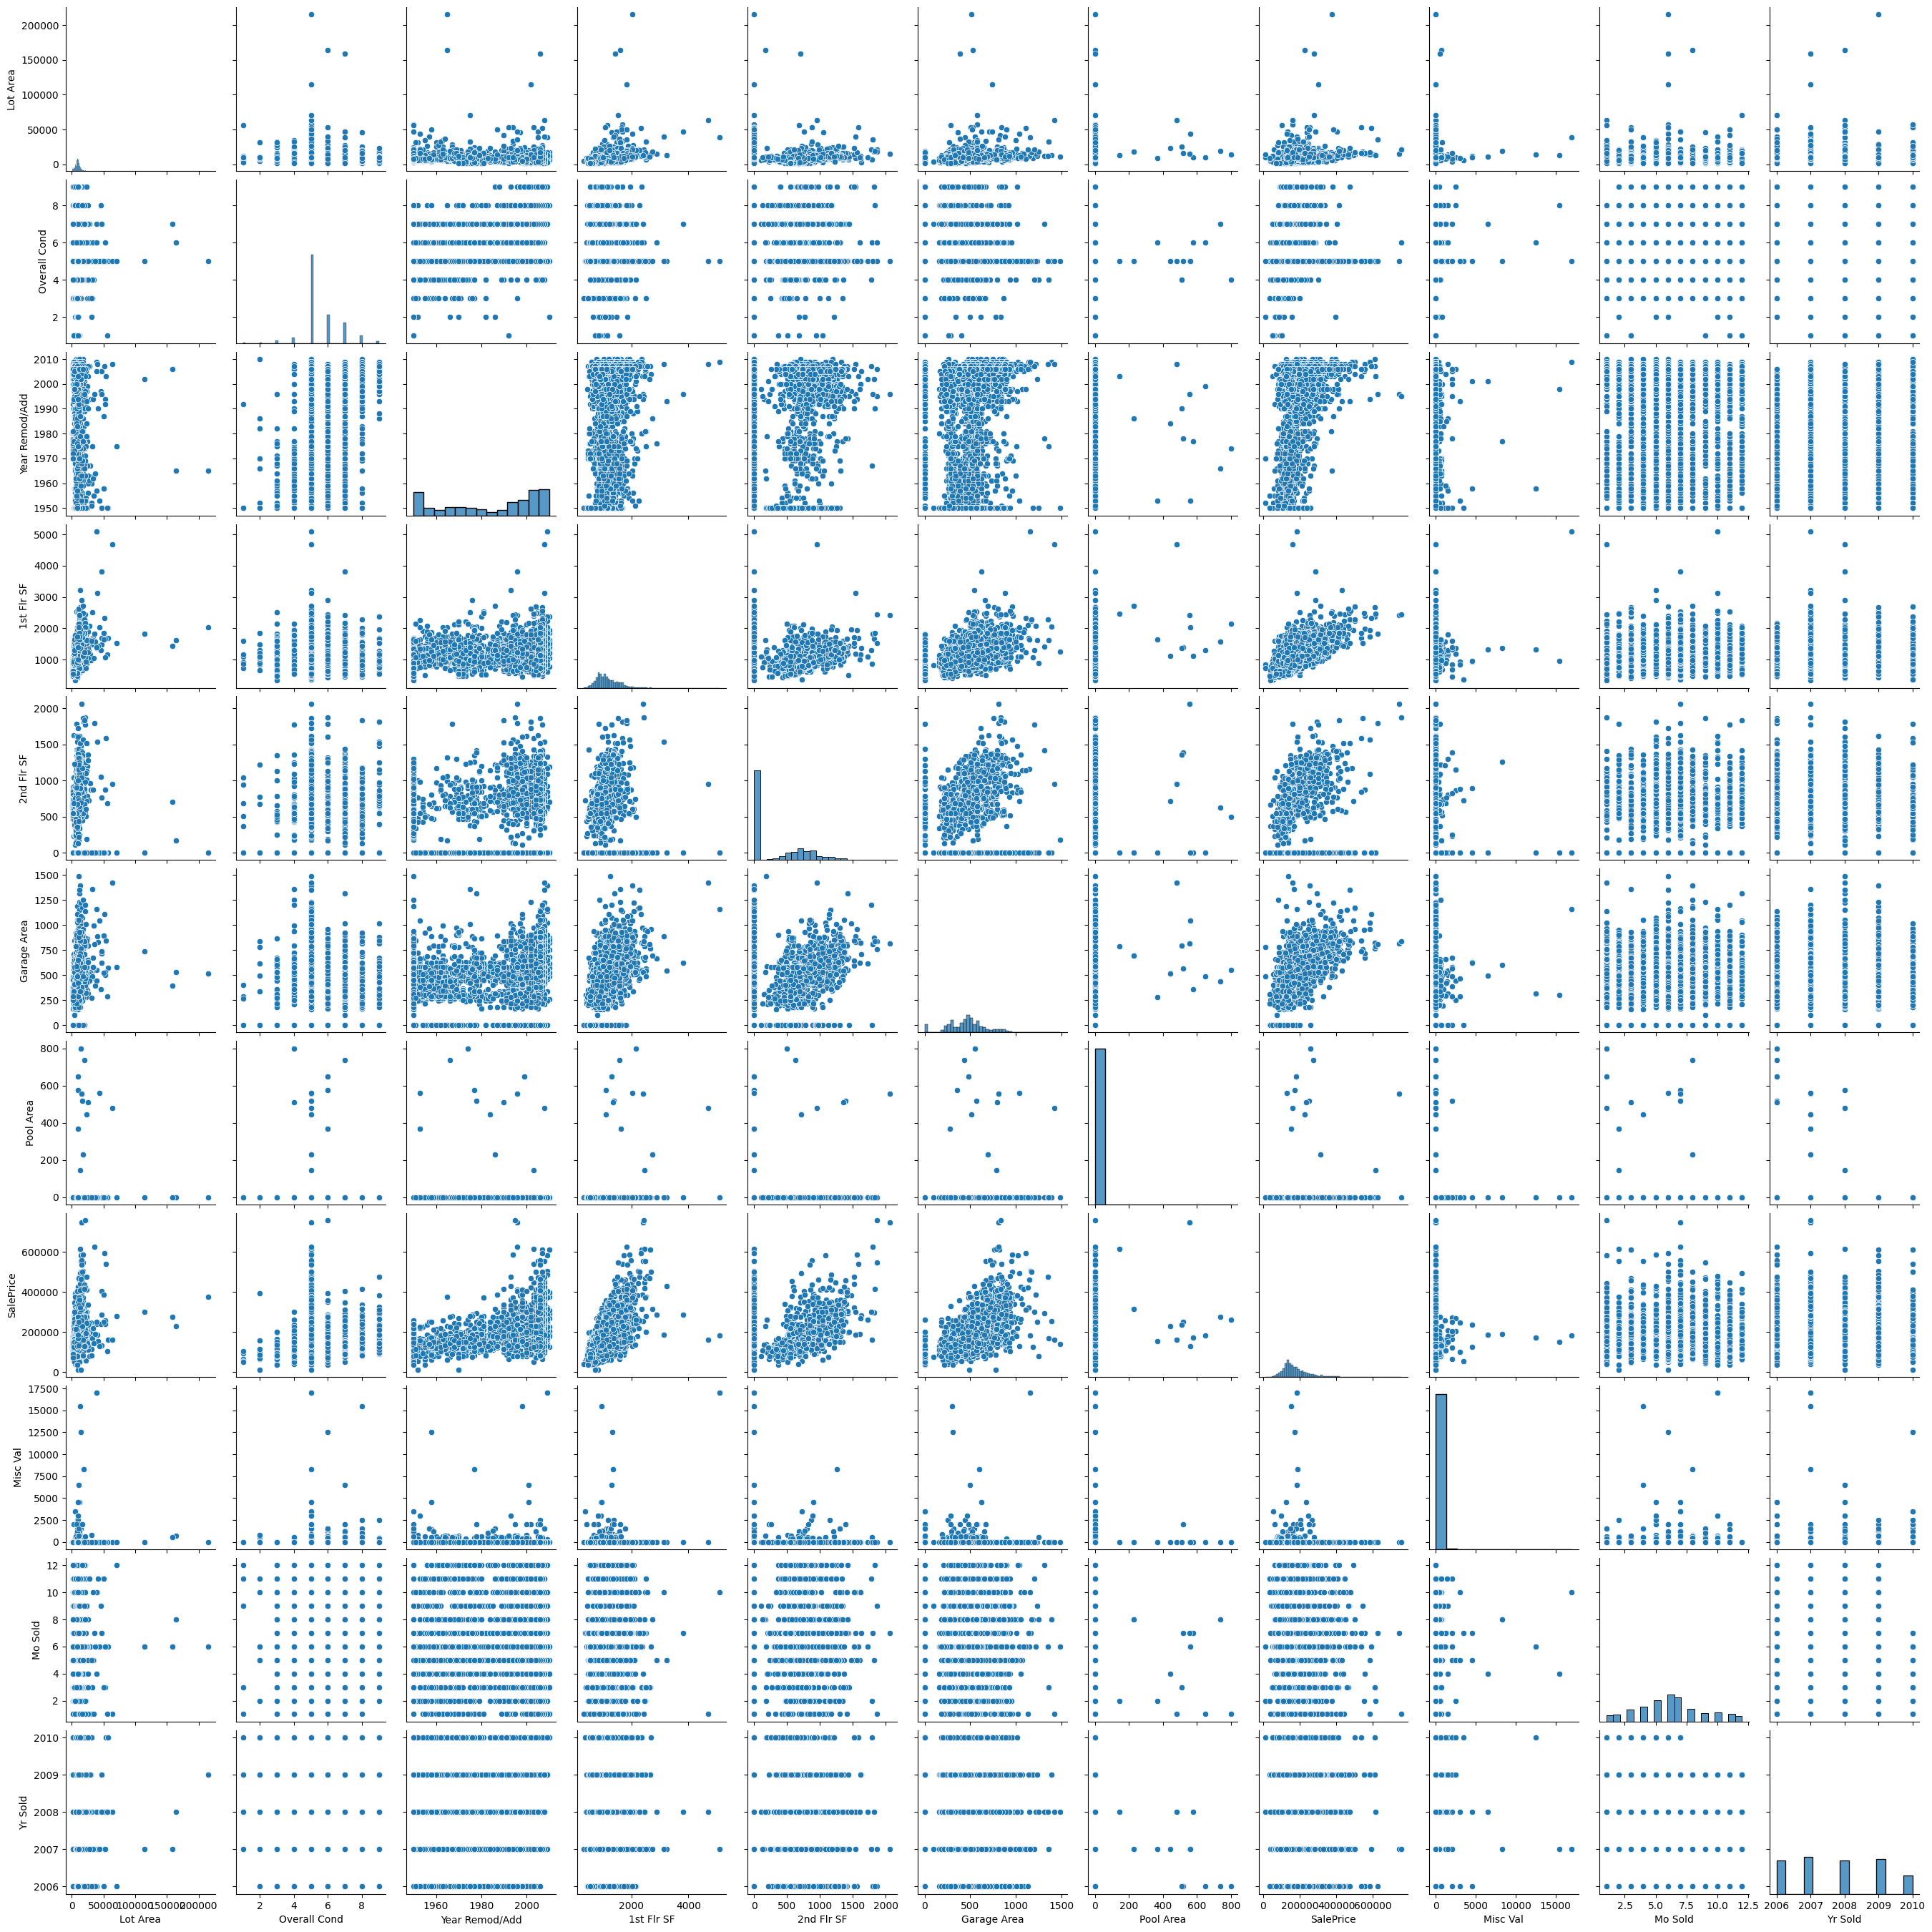

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
from plotnine import *

sns.pairplot(data)
#A pairplot is a matrix of scatterplots, where each feature in the DataFrame is compared with the other features
#Visualize the relationship between multiple variables at once
#Identify trends, correlations, and patters that might be useful in a data analysis or machine learning project

In [31]:
#convert stringdata into numeric data
from sklearn.preprocessing import LabelEncoder

new = pd.DataFrame() #create empty DataFrame
encode = LabelEncoder()
for i in data_obj.columns: #iterate over each column of data_obj
  new[i] = encode.fit_transform(data_obj[i]) #transform by assigning values


In [35]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2929 entries, 0 to 2928
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Street       2929 non-null   int64  
 1   House Style  2929 non-null   int64  
 2   Bldg Type    2929 non-null   int64  
 3   Roof Style   2929 non-null   int64  
 4   Foundation   2929 non-null   int64  
 5   Heating      2929 non-null   int64  
 6   Central Air  2929 non-null   int64  
 7   Garage Type  2929 non-null   int64  
 8   Paved Drive  2929 non-null   int64  
 9   Sale Type    2929 non-null   int64  
 10  salePrice    2928 non-null   float64
dtypes: float64(1), int64(10)
memory usage: 251.8 KB


Data type has been changed to int

In [34]:
new['salePrice'] =data['SalePrice']
data.head()

,Lot Area,Street,House Style,Bldg Type,Overall Cond,Year Remod/Add,Roof Style,Foundation,Heating,Central Air,...,2nd Flr SF,Garage Type,Garage Area,Paved Drive,Pool Area,SalePrice,Misc Val,Mo Sold,Yr Sold,Sale Type
0,31770,Pave,1Story,1Fam,5,1960,Hip,CBlock,GasA,Y,...,0,Attchd,528.0,P,0,215000,0,5,2010,WD
1,11622,Pave,1Story,1Fam,6,1961,Gable,CBlock,GasA,Y,...,0,Attchd,730.0,Y,0,105000,0,6,2010,WD
2,14267,Pave,1Story,1Fam,6,1958,Hip,CBlock,GasA,Y,...,0,Attchd,312.0,Y,0,172000,12500,6,2010,WD
3,11160,Pave,1Story,1Fam,5,1968,Hip,CBlock,GasA,Y,...,0,Attchd,522.0,Y,0,244000,0,4,2010,WD
4,13830,Pave,2Story,1Fam,5,1998,Gable,PConc,GasA,Y,...,701,Attchd,482.0,Y,0,189900,0,3,2010,WD


<Axes: xlabel='Street'>

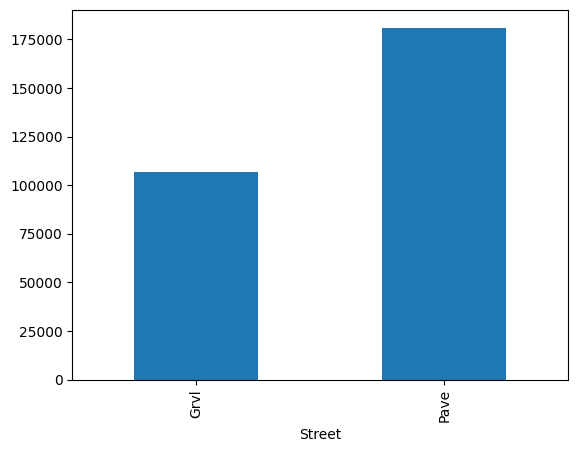

In [38]:
#compare average sale price across different streets
data.groupby(['Street'])['SalePrice'].agg('mean').plot(kind ='bar')

In [40]:
y = data[['Pool Area','SalePrice','House Style']].melt(id_vars = 'House Style')
y.head()

,House Style,variable,value
0,1Story,Pool Area,0
1,1Story,Pool Area,0
2,1Story,Pool Area,0
3,1Story,Pool Area,0
4,2Story,Pool Area,0


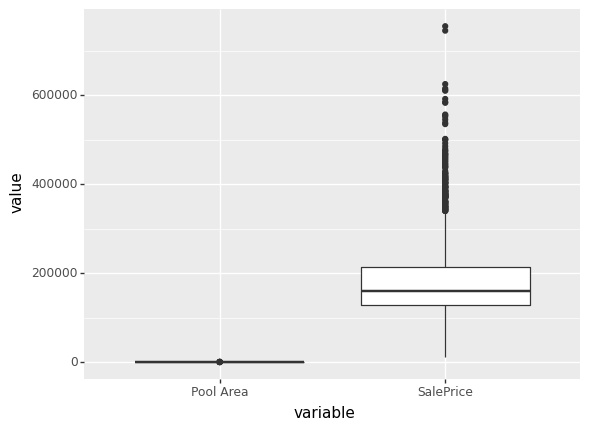

<ggplot: (8687943211138)>

In [43]:
(ggplot(y,aes(x = 'variable', y= 'value'))+geom_boxplot())

The pool area seems not to have any effect on the house prices

In [44]:
data.head()

,Lot Area,Street,House Style,Bldg Type,Overall Cond,Year Remod/Add,Roof Style,Foundation,Heating,Central Air,...,2nd Flr SF,Garage Type,Garage Area,Paved Drive,Pool Area,SalePrice,Misc Val,Mo Sold,Yr Sold,Sale Type
0,31770,Pave,1Story,1Fam,5,1960,Hip,CBlock,GasA,Y,...,0,Attchd,528.0,P,0,215000,0,5,2010,WD
1,11622,Pave,1Story,1Fam,6,1961,Gable,CBlock,GasA,Y,...,0,Attchd,730.0,Y,0,105000,0,6,2010,WD
2,14267,Pave,1Story,1Fam,6,1958,Hip,CBlock,GasA,Y,...,0,Attchd,312.0,Y,0,172000,12500,6,2010,WD
3,11160,Pave,1Story,1Fam,5,1968,Hip,CBlock,GasA,Y,...,0,Attchd,522.0,Y,0,244000,0,4,2010,WD
4,13830,Pave,2Story,1Fam,5,1998,Gable,PConc,GasA,Y,...,701,Attchd,482.0,Y,0,189900,0,3,2010,WD


In [52]:
dy = data.copy()

In [53]:
#encode all columns from the new DataFrame
from sklearn.preprocessing import LabelEncoder

for column in dy.columns:
  if dy[column].dtypes=='object':
    encode = LabelEncoder()
    dy[column] = encode.fit_transform(dy[column])
  else:
    pass
dy.head()

,Lot Area,Street,House Style,Bldg Type,Overall Cond,Year Remod/Add,Roof Style,Foundation,Heating,Central Air,...,2nd Flr SF,Garage Type,Garage Area,Paved Drive,Pool Area,SalePrice,Misc Val,Mo Sold,Yr Sold,Sale Type
0,31770,1,2,0,5,1960,3,1,1,1,...,0,1,528.0,1,0,215000,0,5,2010,9
1,11622,1,2,0,6,1961,1,1,1,1,...,0,1,730.0,2,0,105000,0,6,2010,9
2,14267,1,2,0,6,1958,3,1,1,1,...,0,1,312.0,2,0,172000,12500,6,2010,9
3,11160,1,2,0,5,1968,3,1,1,1,...,0,1,522.0,2,0,244000,0,4,2010,9
4,13830,1,5,0,5,1998,1,2,1,1,...,701,1,482.0,2,0,189900,0,3,2010,9


all string value has been encoded, for ease of vvisualization

In [54]:
dy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929 entries, 0 to 2929
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2929 non-null   int64  
 1   Street          2929 non-null   int64  
 2   House Style     2929 non-null   int64  
 3   Bldg Type       2929 non-null   int64  
 4   Overall Cond    2929 non-null   int64  
 5   Year Remod/Add  2929 non-null   int64  
 6   Roof Style      2929 non-null   int64  
 7   Foundation      2929 non-null   int64  
 8   Heating         2929 non-null   int64  
 9   Central Air     2929 non-null   int64  
 10  1st Flr SF      2929 non-null   int64  
 11  2nd Flr SF      2929 non-null   int64  
 12  Garage Type     2929 non-null   int64  
 13  Garage Area     2929 non-null   float64
 14  Paved Drive     2929 non-null   int64  
 15  Pool Area       2929 non-null   int64  
 16  SalePrice       2929 non-null   int64  
 17  Misc Val        2929 non-null   i

In [47]:
#drop null values from the new DataFrame
dy = dy.dropna()

# **REGRESSION ANALYSIS**

In [55]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
x = dy.drop('SalePrice',axis = 1)
y = dy['SalePrice']

# scale the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
xscale = scale.fit_transform(x)

print(x.shape,y.shape)
x_train,x_test,y_train,y_test = train_test_split(xscale,y,test_size = 0.2, random_state = 1)


(2929, 20) (2929,)


In [56]:
#initialize the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [57]:
#fit the model with our data
model.fit(x_train,y_train)

LinearRegression()

In [58]:
#evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error
pred = model.predict(x_test)
print(mean_absolute_error(y_test,pred))

25776.495549573625


In [59]:
x_test.shape

(586, 20)

In [60]:
dz = pd.DataFrame()
dz['predictions'] = pred
dz['y_test'] = list(y_test)
dz.head()

,predictions,y_test
0,117893.880939,123600
1,196311.466458,209500
2,158782.329779,143000
3,198732.238093,224000
4,228328.827629,187000
